# Investigation of entire homes that are used for business on Airbnb in Copenhagen

# Finding Airbnb listings in Copenhagen that are used primarily for renting out using K-means clustering

Table of contents here

In [1]:
#pip install colour

In [2]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import seaborn as sns
from colour import Color


from IPython.display import HTML, display
import pandas as pd
import numpy as np

from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
from IPython.display import Markdown
from ipywidgets import Layout

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime as dt
import sklearn
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing

from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, FactorRange, CDSView, Label, LabelSet, Range1d
from bokeh.palettes import GnBu3, OrRd3,Spectral6, RdBu3
from bokeh.plotting import figure, show,  output_file
output_notebook()

import os
import random
import folium

from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime


df = pd.read_csv('listingsCPH.csv',low_memory=False)
df['host_since'] = pd.to_datetime(df['host_since'])

Loading BokehJS ...

## Problem statement

**This project aims to determine which listings on Airbnb in Copenhagen that are primarily used for renting out and thus not used as permanent housing and to interpret the different characteristics of these types of listings and visualise the entire process.**

Top achieve this the following approach is used:   
Step 1: Explore the data to determine which attributes are most relevant for solving the problem statement.   
Step 2: Apply unsupervised clustering to determine which listings that are primarily used for renting out.   
Step 3: Use domain knowledge and the results of the unsupervised clustering to identify personas and use these to illustrate the different listing types.   
Step 4: Communicate the results obtained using a website aimed at the end user being a person with no specific data analysis knowledge.   

## Table of contents

# 1. Motivation 
In this chapter the reasons behind working with this topic is explained and the data used is briefly described. Furthermore the goals of the visualisation end user experince are described. This section contains:   

- 1.1 Introduction
- 1.2 The data
- 1.3 Visualisation and user experience

### 1.1 Introduction
#### <span style='color:Red'>(1.2 Why did you choose this particular dataset?)</span>

A trend of sharing economy has arisen, because of the image of being climate-friendly and at the same time earn money on unused resources, [ref: Sharing Economy is the new black](http://www.businesspower.dk/deleoekonomi-nye-sort/). At the same time, Copenhagen has shortages of housing, which leed to the question if some apartments are used as "hotels" rather than for housing citizen,
[ref: Lack of housing in Copenhagen](https://www.berlingske.dk/danmark/stor-mangel-paa-boliger-foer-studiestart). 

On April 4, 2019, the Danish parliament voted on new law regarding home-sharing which is now passed, [ref: responsible hosting in Denmark](https://www.airbnb.ca/help/article/1382/responsible-hosting-in-denmark?_set_bev_on_new_domain=1586096803_kQkMaj8/azaxEBxq&locale=en). With this new regulation homes can earn up to 28.000 DKK tax-free a year. For summerhouses, this is up to 40.000DKK, [Learn more click here](https://news.airbnb.com/denmark-approves-forward-thinking-home-sharing-rules-and-simplifies-tax/).   

These new regulations make it possible for private households to rent our their primary home up to 70 days, on the condition that they use a platform that collaborates with the government, such as Airbnb. Airbnb has agreed with the Danish Tax Authority to ensure hosts on Airbnb gets the benefit of the new regulations.  In return, Airbnb shares earning data with the danish tax authorities, [ref: Denmark approves forward-thinking home-sharing rules and simplifies tax](https://news.airbnb.com/denmark-approves-forward-thinking-home-sharing-rules-and-simplifies-tax/). <span style='color:Red'>The published data gives new opportunities to investigate Airbnb as a sharing economy platform.<span/>   
    
These new regulations makes it easier for Airbnb users who rents out their primary home occusionally, but also makes life diffucult for those who rent rent out a place for business purposes. Combined with the lack of affordable housing in Copenhagen, this makes it interesting to investigate how many listings are actually used primarily for renting out, which is the aim of this project.

### 1.2 The data

The dataset is obtained from insideairbnb.com [[insideairbnb]](http://insideairbnb.com/get-the-data.html), where there is data for a larger number of european cities. The data is updated once each month and is data scrapes of the Airbnb platform for each listing and host for the given city, which means that all the data is publicly available and can be manually located by simply visiting the [airbnb.dk](http://airbnb.dk). In this project the focus is determined to be Listings in Copenhagen only as this allows better for utilisation of domain knowledge, since all group members are based in Copenhagen.

There are 3 main data files for each city: 
- **Calander data:** Contains information about which dates a given listing is available at the time of scape. If a listing is not available, it is not possible to see if a listing is booked og just made unavailable by the host.
- **Review data:** This data contain review data for each listing.
- **Listings data:** This data contain all information about the listings, but also includes some aggregated measures from the calander and review data. The two most important aggregated measures are the number of available days the next 365 days (anchored at scape date) and the number of reviews per month. 

In this project the Listings data set is used, since this provides much information about the listings but also include the most essential information for calander and review data for this application. 
The chosen dataset was scraped on 29/02/2020 and is names *listings.csv.gz*, and provides listing information for Copenhagen only. These particular scape was chosen since it was just before the Covid-19 really started to affect the behaviour of the danish people, but also recent enough to provide an image of the current situation.   

The dataset contains of 28.418 rows (listings) and 116 attributes. The attributes are shown in the following list:

In [3]:
# Print all the attributes, to get an overview. 
X = []  

for row in df:
    print(row)
    X.append(row)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

### 1.3 Visualisation end user experience
<span style='color:Red'>1.3 What was your goal for the end user's experience?<span/>

The goal is to create a webpage, that is author-driven with some elements of interactivity, meaning that the problem statement is told with a clear narrative. The following three key elements are taking into account. [ref: explanatory data visualization](https://www.youtube.com/watch?v=yHKYMGwefso)

1. **A question (what results and which stories to tell?)**   
Clear outline of the problem statement.


2. **Allow exploration:**
     - _Overview:_ Make visualisations that give the reader a quick overview of the situation that are investigated. 
     - _Zoom and filter:_ Make it possible to zoom and filter when this creates value for the reader. 
     - _Details on demand:_ Make relevant visualisations interactive. This allows the reader to obtain more information about the parts they find interesting.      
     

3. **Design for an audience (know your readers)** 
The audience is a person with no particular data analysis knowledge but with minor knowledge about the most well known neighbourhoods in Copenhagen.   
<span style='color:Red'>The users are identified as one of the following:
    - People who are interested in Airbnb in Copenhagen, an example could be hosts who want to compare themselves with others.
    - People with a general interest in free accessed city data and data visualisation. <span/>

# 2. Basic stats

The purpose of this chapter is to explore the data. This is done by cleaning and filtering the data and finding aspects of the data to dive deeper into in the context of the problem statement. This chapter contains the sections:

- 2.1 Data cleaning and preprocessing
- 2.2 Exploratory data analysis and filtering
     - 2.2.1 Property type
     - 2.2.2 Prices of listings
     - 2.2.3 Location of listings
     - 2.2.4 New Hosts
     - 2.2.5 Measure of activeness of listing

### 2.1 Data cleaning and preprocessing

The dataset has sufficient amount of data and the data has an overall good quality. There are some null values that will be identified and processed during the analysis. 

Below "$" and "," are removed from price and dates are converted to datetime. In addition, price and neighbourhood_cleansed are updated with the correct data type. 

In [4]:
df['price'] = df['price'].str.replace(r',', '')
df['price'] = df['price'].str.replace(r'$', '')

df['host_since'] = pd.to_datetime(df['host_since'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace(r'%', '')

df = df.astype({'price': 'float','neighbourhood_cleansed': 'category'})

Since not all 116 attributes are used, a new dataframe with the attributes that is used in this project is created and named *dfc*. It is important to note that the removed attributes have been explored, but the following are deemed most interesting in the context fo this project.

In [5]:
# Only take relevant attributes for this analysis. Add if neccessary 
dfc = pd.DataFrame (df, columns = ['last_review', 
                                   'neighbourhood_cleansed', 
                                   'host_name',
                                   'availability_365',
                                   'host_url',
                                   'listing_url',
                                   'latitude', 
                                   'longitude',
                                   'host_picture_url',
                                   'host_id',
                                   'id',
                                   'host_total_listings_count',
                                   'price', 
                                   'host_since',
                                   'room_type', 
                                   'maximum_nights',
                                   'minimum_nights',
                                   'calendar_last_scraped',
                                   'accommodates',
                                   'host_acceptance_rate',
                                   'reviews_per_month'
                                  ])

### 2.2 Exploratory data analysis and filtering

In this section basic plots are shown to find aspects to dive deeper into in the context of the problem statement. Along with this, different cleaning and preprocess choices will be considered.  

#### 2.2.1 Property type

To see which types of property types are actually listed on airbnb in Copenhagen, a stack bar chart is plotted below.

In [6]:
# The total sum af property types. 
Sum_P = len(dfc['room_type'])
Enti = len(dfc[(dfc['room_type'] == 'Entire home/apt')])
Priv = len(dfc[(dfc['room_type'] == 'Private room')])
Sha = len(dfc[(dfc['room_type'] == 'Shared room')])
hot = len(dfc[(dfc['room_type'] == 'Hotel room')])


# Create the right dataframe for this plot
dHomes = pd.DataFrame({'Propertytype': 'Property type',
                       'Entire Homes': (Enti/Sum_P)*100,
                        'Private Rooms': (Priv/ Sum_P)*100,
                       'Hotel Rooms': (hot/Sum_P)*100, 
                        'Shared Rooms': (Sha/Sum_P)*100}, index=[0])

In [7]:
colors = ["#CAF1DE", "#E1F8DC","#FFE7C7", '#D3D3D3']    

Cat =["Entire Homes","Private Rooms", "Shared Rooms", 'Hotel Rooms']

Propertytype = dHomes["Propertytype"]

x_label = "% of host listings" 

sourceDh = ColumnDataSource(dHomes)

In [8]:
pHomes = figure(y_range=Propertytype, plot_height=300, plot_width =900, x_axis_label = x_label, title="% of host listings by property Type",
           toolbar_location=None, tools="hover", tooltips="$name @$name%")

pHomes.hbar_stack(Cat, y='Propertytype', height=0.8, source=sourceDh, color=colors, 
             legend=[dict(value=["Entire Homes"]),dict(value=["Private Rooms"]), dict(value=["Shared Rooms"]), dict(value=["Hotel Rooms"])])

pHomes.legend.location = "top_right"
pHomes.legend.orientation = "vertical"
pHomes.xgrid.visible = False
pHomes.ygrid.visible = False

#labels = LabelSet(y='Propertytype', text='Cat', level='glyph',
#              x_offset=5, y_offset=5, source=sourceDh)

#pHomes.add_layout(labels)
show(pHomes) 



**Note:** Det kunne være fedt at få labelsæt til at virke, altså at der kommer label på selv baren i chartet. 

As seen in the above plot, the most dominant room type is Entire homes follow by private rooms. Shared rooms adn hotel rooms cover on about 0.4% of the total number of listings.   
As mentioned in the problem statement, the idea of this project is to determine which listings are used primarily for renting out. It is assumed, that if a listing is a private or shared room a person actually lives in the home but just rents out some extra space. These are not the types of listings of interest. Hotel rooms are also different from entire homes and is thus not of interest.   
This leaves 'entire homes' which is the scope of this project. The remaining property type categories are thus filtered out of the data below. 

In [9]:
size_beforeProp = len(dfc)
dfc = dfc[(dfc['room_type'] == 'Entire home/apt')]
size_afterProp = len(dfc)
print(str(size_beforeProp-size_afterProp) + " rows are removed, these are hosts with property type private, shared or hotel rooms.")

4492 rows are removed, these are hosts with property type private, shared or hotel rooms.


#### 2.2.2 Prices of listings

The price per night (called price for short) is interesting because this is the main driver for renting out and gives a good impression of the Airbnb market in Copenhagen. The prices of different neighbourhoods are shown by using boxplots in the following.

In [10]:
chosen_attributes_price = ['id','price','last_review', 'neighbourhood_cleansed','host_total_listings_count', 'host_name','availability_365','host_url']

Remove na values from the price column of the copy of the data frame if any na's exists.

In [11]:
data_new_hosts_clean = dfc
size_before_Price = len(data_new_hosts_clean)
data_new_hosts_clean = data_new_hosts_clean.dropna(axis=0, subset=['price'])
size_after_Price = len(data_new_hosts_clean)
print(str(size_before_Price-size_after_Price) + " na rows removed from data")

0 na rows removed from data


Define the data that are used for plotting the boxplots

In [12]:
data_price = pd.DataFrame (data_new_hosts_clean, columns = chosen_attributes_price)

Change the datatypes to the correct type

In [13]:
data_price = data_price.astype({'price': 'float','neighbourhood_cleansed': 'category'})

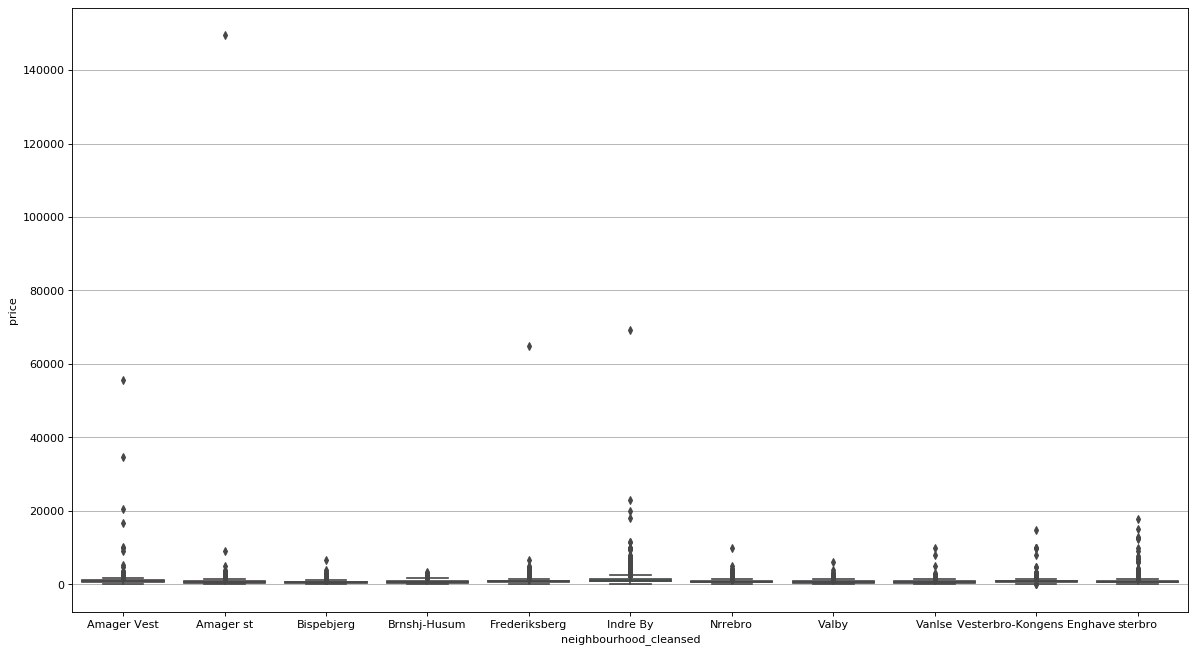

In [14]:
fig =plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.boxplot(x="neighbourhood_cleansed", y="price", data=data_price)
ax.yaxis.grid(True)

In the chart above some outliers are seen, where som listings are very expensive. When looking into these outliers, the listings are either luxury apartments or normal apartments where the price has been increased to what seems like an unrealistic amount for no aparent reason. 

These few listings that are very expensive makes it hard to see the distribution of the prices. A filter is therefore applied below. 

In [15]:
size_before_Price = len(data_price)
condition1 = data_price['price'] <= 5000
data_price_filter = data_price[condition1]
size_after_Price = len(data_price_filter)
print(str(size_before_Price-size_after_Price) + " rows removed from data")

72 rows removed from data


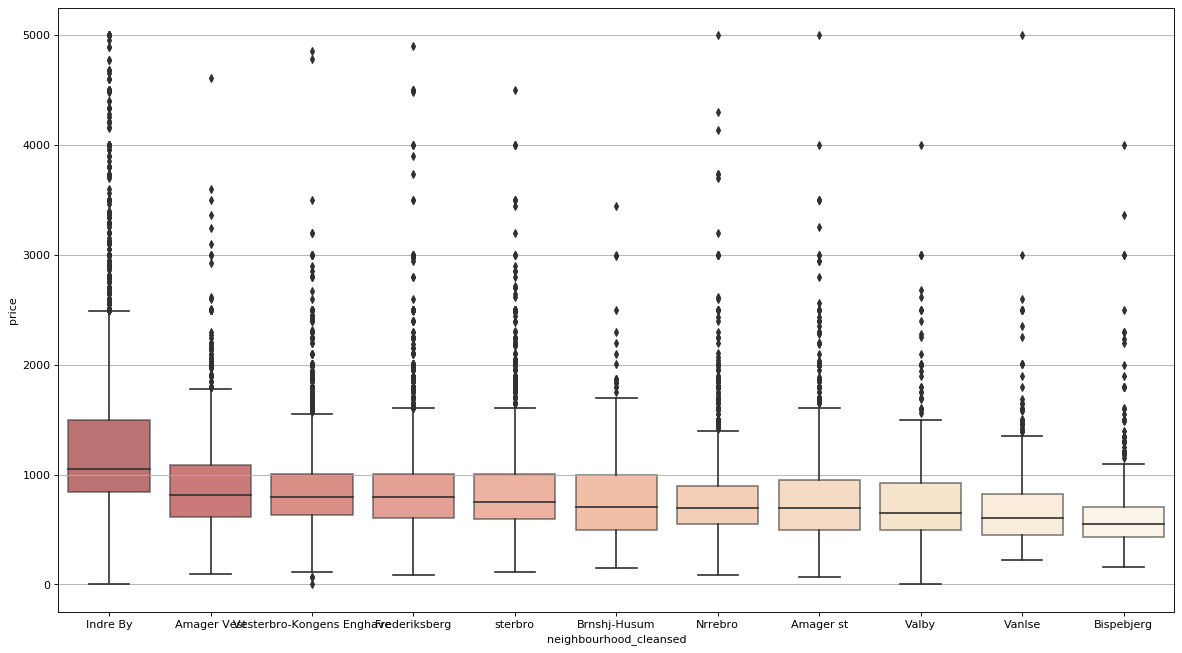

In [16]:
fig =plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

item_order = data_price_filter.groupby(by=['neighbourhood_cleansed'])['price'].median().sort_values(ascending=False).index

ax = sns.boxplot(x="neighbourhood_cleansed", y="price", 
                 data=data_price_filter, order=item_order,palette="OrRd_r",boxprops=dict(alpha=.6))
ax.yaxis.grid(True)

The boxplots by the median in descending order, which shows that the most expensive neighbourhood is "Indre By" and that prices seem to decrease as the listing moves further away from the city centre - se for example "Vanløse". This is probably due to the fact that tourist are the most frequent users of Airbnb in Copenhagen and prefers to live close to the city center where the main attractions are located. They will therefore be willing to pay a higher price for the location.   

If for instance a student has an appartment in 'Indre By' and rents it out for less than the median price, for 7 nights, this will result in an income larger than the monthly SU (state education grant). 

#### 2.2.3 Location of listings
To provide a general overview of where most listings on Airbnb in Copenhagen are located, a heat map is generated. 

In [17]:
#No duplicates of hosts
#heatdata = dfc.drop_duplicates(subset=['host_id'])

# If there are any NA's, ignore these
heatdata = dfc.dropna(axis=0, subset=['latitude', 'longitude'])

In [18]:
map_CPHheat = folium.Map(location=[55.672163978, 12.568164394], 
                    zoom_start = 12,
                    tiles = "Stamen Terrain")

# Add a marker
folium.Marker([55.672163978, 12.568164394], popup='Copenhagen City Hall', icon=folium.Icon(color='lightgray', icon='building', prefix='fa')).add_to(map_CPHheat)

# Ensure the datatype is float
heatdata['latitude'] = heatdata['latitude'].astype(float)
heatdata['longitude'] = heatdata['longitude'].astype(float)

# List comprehension to make out list of lists
heatdata = [[row['latitude'],row['longitude']] for index, row in heatdata.iterrows()]

#gradient = {.40: '#F5F5DC', .66: '#ffeeed', 1: 'red'}
gradient = {.3: 'lightgreen', .5: 'yellow',0.7: 'orange', 0.80: 'red', 0.9: 'darkred'}

# Plot on the map
#HeatMap(heatdata, max_opacity=0.8, radius = 7, max_zoom=16, gradient=gradient).add_to(map_CPHheat)
HeatMap(heatdata, max_opacity=0.8, radius = 6.5, max_zoom=17, gradient=gradient).add_to(map_CPHheat)

# Display the map
map_CPHheat

As seen it the heat map above, there are some areas where the listings are more densely located than in other areas. In general, it seems like the number listings decrease as the distance to the city center (defined as city hall, see pin) increases. Except in Østerbro and Nørrebro area, where listings may not be close to city hall, but a located close to attractions such as 'Kastellet' and 'Nørrebro'. Additionally new construction areas in Copenhagen such as Sydhavnen, Islandsbrygge, Ørestad etc. seems to have a dense number of listings, [[new construction areas in Copenhagen](https://propstep.com/da/nybyggerier-i-koebenhavn/)]. <span style='color:Red'>A theory could be that hosts buy the new houses in Copenhagen and use them for business. If this theory holds, this puts pressure on the housing market in Copenhagen. MTK: Måske bør vi gemme disse tanker til clusteranalysen. <span/>   

The map also reveals which areas of the city that people live, and which areas are used for other things such as parks (see for instance 'Botanisk Have') and Educational Institutions (see for instance Center for Sundhed og Samfund, CSS just southwest of 'Botanisk Have').


#### 2.2.4 New Hosts
As mentioned in the introduction, the use of sharing economy platforms have been rising within recent years. To see how this development looks for Airbnb in Copenhagen, the time that a host signed up for Airbnb in investigated. This also gives an impression of the total number of hosts. To perform this analysis, the raw data is used. 
This data is illustrated by by year and shown by new hosts yearly and the running total of new hosts. The number of new hosts is found by counting the distinct host ID for each year. 

In [19]:
# Should be host_since and host_id
chosen_attributes_host = ['host_since']

Remove na values from the data frame copy 

In [20]:
data_new_hosts_clean = df
size_before = len(data_new_hosts_clean)
data_new_hosts_clean = data_new_hosts_clean.dropna(axis=0, subset=chosen_attributes_host)
size_after = len(data_new_hosts_clean)
print(str(size_before-size_after) + " na rows removed from data")

9 na rows removed from data


In [21]:
data_new_hosts = pd.DataFrame (data_new_hosts_clean, columns = chosen_attributes_host)

#Add a column with year
data_new_hosts['host_since_year'] = pd.DatetimeIndex(data_new_hosts['host_since']).year

In [22]:
# Aggregate the data by grouping by year and count listings within each year.
agg_new_hosts = data_new_hosts.groupby(['host_since_year']).count()

In [23]:
# Prepare for plotting
host_since_years = agg_new_hosts.index.to_numpy()
host_since_years = np.transpose(host_since_years)

In [24]:
# Prepare for plotting
host_since_count = agg_new_hosts.to_numpy()
l=host_since_count
flatten = lambda l: [item for sublist in l for item in sublist]
host_since_count = flatten(l)

Compute the running total

In [25]:
host_since_running_total = np.cumsum(host_since_count)

Plot the data together

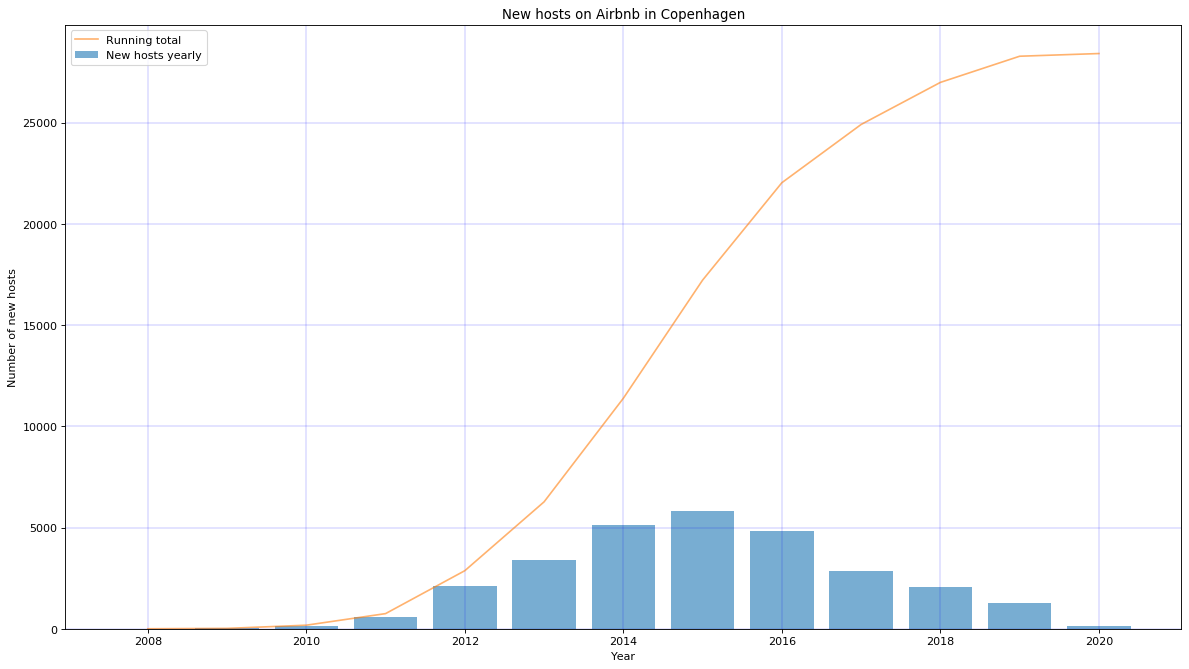

In [26]:
fig =plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.bar(host_since_years,host_since_count, 
            color='tab:blue', label ='New hosts yearly', alpha=0.6)
plt.plot(host_since_years,host_since_running_total, 
            color='tab:orange', label ='Running total', alpha=0.6)

plt.title('New hosts on Airbnb in Copenhagen')
plt.xlabel('Year')
plt.ylabel('Number of new hosts')
plt.legend()

plt.grid(color='b', linestyle='-', linewidth=0.2)

As seen in the above plot, the peak of new hosts was in 2015 and the running total is still increasing as of 2020.   
The interesting aspect of this is whether these hosts are active users of Airbnb, and is explored in the following. 

#### 2.2.5 Measure of activeness of listing

An apparent measures of activeness of a listing is to use the attribute 'reviews_per_months', which is aggregated based on the review data mentioned in chapter 1 of this project. This gives an idea of how often the listing in rentet out. Even though not every guest gives a review, it still provides a good relative measure of how often a listing is rentet out. 

Another measure of activeness is whether a listing has availability or not. A listing used as a sharing economy listing might still occasionally be active, even though the availability the next 365 days is 0. A listings used primarily for renting out will most likely have some availability the next 365 days. It is important to remember that if a listing is non availabile on a given day, it can either mean that a listings is set unavailable by the host or that the listing is booked. This data is not published by Airbnb.   

Based on this, all listings that have an availability the next 365 days equal to zero are removed from the dataset, because the goal is to determine which listings are used primarily for renting out. This will intensionally remove a large amount of the data.

In [27]:
# Remove listings with availability_365=0
size_beforeProp = len(dfc)
condition_availability = dfc['availability_365'] >= 1
dfc = dfc[condition_availability]
size_afterProp = len(dfc)
print(str(size_beforeProp-size_afterProp) + " rows are removed, because listings have availability_365=0.")

14786 rows are removed, because listings have availability_365=0.


# 3. Data Analysis

The purpose of this section is to determine if a listing is used primarily for renting out (not used as primary housing) or as a sharing economy (used as primary housing). In the remainder of this report the listings used primarily for renting out are called 'Business' and the listings used primarily as housing are called 'Shared'.

Clustering the listings in either 'Business' or 'shared' is done by initially investigating which attributes are relevant in this context and then applying unsupervised clustering (K-means) and interpretation of the generated clusters. This chapter contains the following sections:

- 3.1 Unsupervised clustering to determine business vs. shared
    - 3.1.1 Relevant attributes to include in unsupervised clustering 
    - 3.1.2 Normalise the data
    - 3.1.3 The Elbow method - determine the number of clusters
    - 3.1.4 Visualisation and interpretation of the clusters 
- 3.2 Hosts using Airbnb as a business platform for entire appartmens 

### 3.1 Unsupervised clustering to determine business vs. shared   
The goal of using unsupervised clustering is to discover hidden patterns, and to cluster the different listings into groups with similar characteristics. 

The approach is to initially perform the K-means cluster analysis and then manually interpret the clusters and then assign the clusters to either the 'business' or the 'shared' class. In short term, the k-means clustering minimize the sum of squared distances to the center of the clusters. A cluster can be seen as a set of data points that are similiar and disimiliar to the other clusters. The thing that is important to have in mind when using clustering is that the number of cluster centers (centroids) K, is an input to the algoritm. The value K (number of clusters to be generated) of course influences the solution a lot and it is therefore important to determine the best possible K for the given application. [ref: Unsupervised learning and data clustering.](https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a). For the clustering performed in this chapter, the Elbow method is applied. 

#### 3.1.1  Attributes included in unsupervised clustering

The attributes used as input to the K-means clustering, were determined by initially assesing using domain knowledge which attributes are most probable to impact whether a listing is busineness or shared. The chosen attributes listed below are the final choice, but more attributes were also added and different combinations were tried. The below combination yielded the best results with regard to interpretability and clarity in dividing the generated cluster into business or shared. The chosen attributes are:   

- **availability_365:** The number of days the listing is available for booking in the next 365 days measured from the data of the data scrape.
- **reviews_per_month:** The number of reviews per month for the lising.
- **host_total_listings_count:** The number of listings that the host for the given listing has in total.

In [28]:
chosen_attributes = ['availability_365','reviews_per_month','host_total_listings_count']

Remove na values from a dataframe copy to be able to append the data after clustering the data. Note that if a listings has no reviews at all, the reviews per month attribute is an na value and will thus be removed in the following cleaning. 

In [29]:
dfc_copy = dfc
size_before = len(dfc_copy)
dfc_copy = dfc.dropna(axis=0, subset=chosen_attributes)
size_after = len(dfc_copy)
print(str(size_before-size_after) + " na rows removed from data_cluster")

1167 na rows removed from data_cluster


In [30]:
# If statement to make sure that the correct dataset is used
if df.last_scraped[0] == '2020-02-29':
    print("Correct dataset is used")
else:
    raise ValueError('The wrong dataset is used. It must be the dataset last scraped at "2020-02-29"')

Correct dataset is used


Define the data to be used for clustering

In [31]:
data_cluster = pd.DataFrame (dfc_copy, columns = chosen_attributes)

In [32]:
#Display a sample of the data, to get an overview. 
data_cluster.head(5)

,availability_365,reviews_per_month,host_total_listings_count
1,333,0.66,1.0
2,81,2.56,4.0
3,26,0.19,1.0
6,38,0.63,4.0
7,70,0.06,1.0


To get a sense of how the attributes used for the clustering distributes, histograms and scatter plots for the different attributes are shown below.

In [33]:
data_cluster_hist = data_cluster

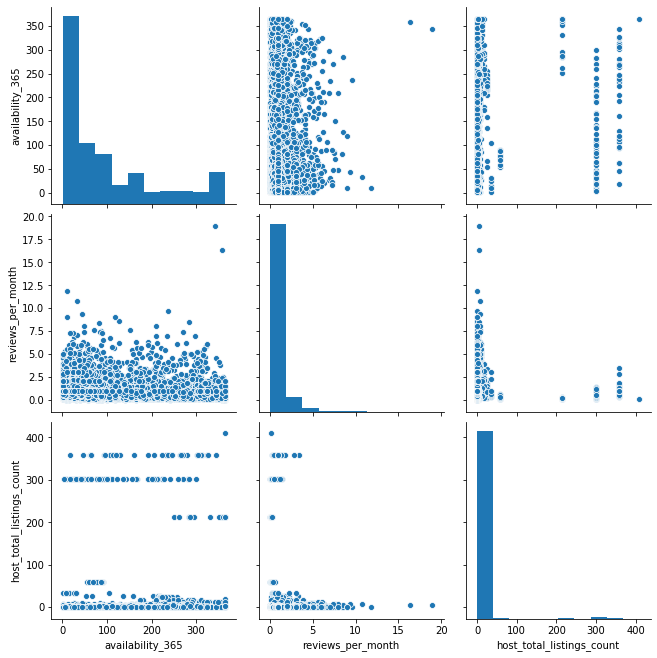

In [34]:
sns.pairplot(data_cluster_hist,height=3)

By looking a the plots vertically for one attribute at a time:   
- **Availability_365:** Most listings are available for less than 100 days, whereas the availability above 100 days is evenly distributed execpt for a peak in the high end of the availability up to one year. 
- **Reviews per month:** Most of the data lies below 3 reviews per month and only a small percentage has more than 5 reviews per month. 
- **Host total listings:** The main part of host listings count lies in the low end and only a few listings have a high number of around 300. These listings will most likely have the same host since the data points resides on a straigt vertical line in the top right plot. 

#### 3.1.2 Normalise the data

When applying clustering, it is important to normalise the data, which is done using the standard scaler, which subtracts the mean and divides by the standard deviation. This ensures, that the clustering will not depend on the units of the data, but on the variability from the mean. 

scale_data = 1: Scale the data   
scale_data = 0: Do not scale the data

In [35]:
scale_data = 1
if scale_data == 1:
    #min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler = preprocessing.StandardScaler()
    x_scaled = min_max_scaler.fit_transform(data_cluster)
    data_cluster = pd.DataFrame(x_scaled,columns=chosen_attributes)
    
data_cluster.head(5)

,availability_365,reviews_per_month,host_total_listings_count
0,2.147320,-0.207069,-0.140189
1,-0.158111,1.660499,-0.062026
2,-0.661281,-0.669046,-0.140189
3,-0.551499,-0.236557,-0.062026
4,-0.258745,-0.796827,-0.140189


#### 3.1.3 The Elbow Method - determine the number of clusters   
To determine K, The Elbow Method is used. Im this method, the K-means algorithm is executed for a range of specified values of K and the within cluster sum of squares are calculated for each K-value. The idea is to find the "elbow" of the corresponding line chart, since this is the point were the gain of increases the number of K starts to decrease.
[ref: kmeans elbow method python](https://pythonprogramminglanguage.com/kmeans-elbow-method/). 

**INPUT:** How many cluster values to test in the Elbow method

In [36]:
cluster_to_test = 10

Loop through all different K-values and compute the within-cluster sum of squares.

In [37]:
wcss=[]

for i in range (1,cluster_to_test+1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_cluster)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Plot the results

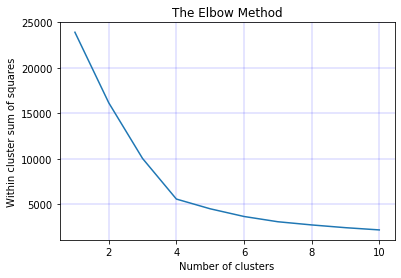

In [38]:
number_clusters = range(1,cluster_to_test+1)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')

plt.grid(color='b', linestyle='-', linewidth=0.2)

As seen in the above plot, the Elbow of the graph is at K=4. However, when looking at the results for only K=4 clusters, the clusters are difficult to interpret, and the number of clusters is thus increased to K=6 to make the clusters even more detailed. The final number of clusters is thus 6. 

In [39]:
K_clusters = 6

#### 3.1.4 Visualitation and interpretation of the clusters

Fit the clustering model for the assigned number of clusters and add labels to the cluster data. The K-means algorithm result may depend on the initialisation, which is randomised. The parameter n_init is set to 100 to ensure that a good final cluster is obtained.

In [40]:
#kmeans = KMeans(n_clusters=K_clusters, random_state=0).fit(data_cluster)
kmeans = KMeans(n_clusters=K_clusters, random_state=0,n_init=100).fit(data_cluster)

#data_cluster = min_max_scaler.inverse_transform(data_cluster.head(5))

# Scale the data back for visuals
if scale_data == 1:
    x_scaled = min_max_scaler.inverse_transform(data_cluster)
    data_cluster = pd.DataFrame(x_scaled,columns=chosen_attributes)
    
data_cluster.head(5)

# Map the generated cluster labels to be sorted by cluster size to make sure same 
# cluster are output no matter which machine algoritm is run on
#idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
idx = np.argsort(kmeans.cluster_centers_[:,0])

lut = np.zeros_like(idx)
lut[idx] = np.arange(K_clusters)+1

print(idx)
print(lut)
# Append the sorted cluster labels
data_cluster['cluster'] = lut[kmeans.labels_]
#data_cluster['cluster'] = kmeans.labels_+1

[1 5 2 0 3 4]
[4 1 3 5 6 2]


#### Plotting the clusters

One of the challenges in visualising cluster is that the are more than two dimensions. To get a sense of the different clusters, the attributes 'availability_365' and 'reviews_per_month' is used.

**INPUT:** Choose which two attributes to use to visualise the clusters

In [41]:
x_axis_attr_index = 0
y_axis_attr_index = 1
x_axis_attr = chosen_attributes[x_axis_attr_index]
y_axis_attr = chosen_attributes[y_axis_attr_index]

Plot the clusters

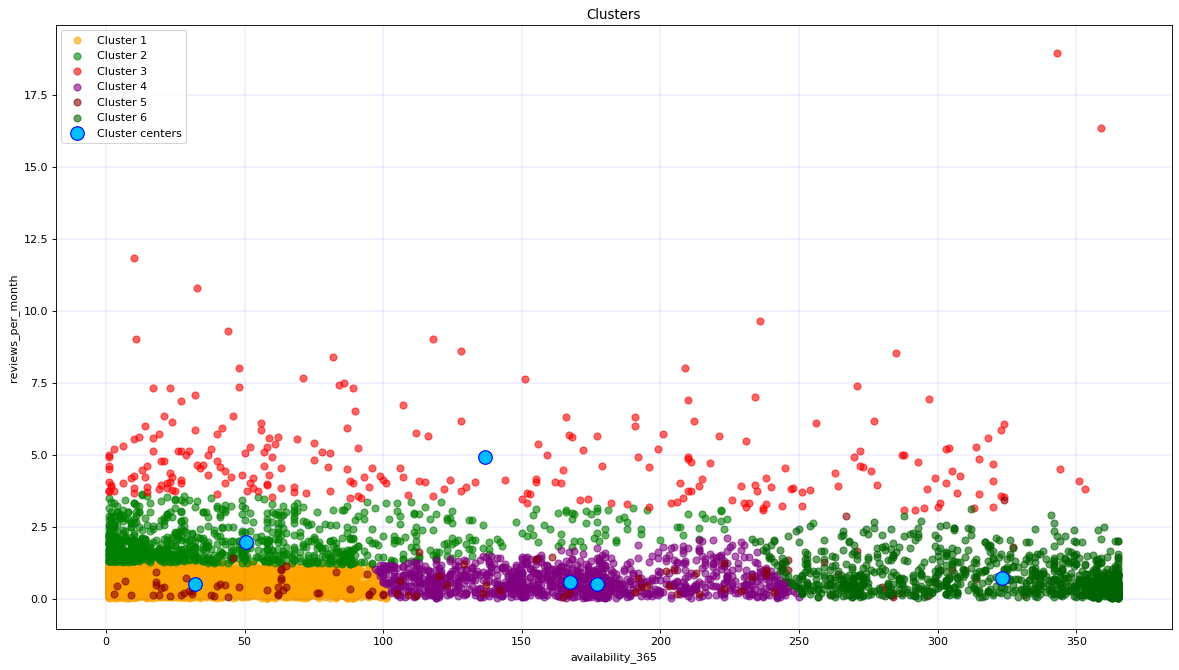

In [42]:
fig =plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')


#tableau_colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
tableau_colors = ['blue','orange','green','red', 'purple', 'darkred','darkgreen','pink','lightblue','lightgreen','grey']


if scale_data == 1:
    # Scale the cluster centers back
    cluster_centers = min_max_scaler.inverse_transform(kmeans.cluster_centers_)

for clus in range(1,K_clusters+1):
    label_cluster = 'Cluster ' + str(clus)

    
    plt.scatter(data_cluster.loc[data_cluster['cluster']==clus,
                x_axis_attr], data_cluster.loc[data_cluster['cluster']==clus,y_axis_attr], 
                s=40, c=tableau_colors[clus], label =label_cluster, alpha=0.6)

plt.scatter(cluster_centers[:,x_axis_attr_index]
            ,cluster_centers[:,y_axis_attr_index], 
            s=150, c='deepskyblue', label ='Cluster centers',marker='o',edgecolors='b')

plt.title('Clusters')
plt.xlabel(x_axis_attr)
plt.ylabel(y_axis_attr)
plt.legend()

plt.grid(color='b', linestyle='-', linewidth=0.1)

As seen in the above plot, the clusters are nicely devided in 6 cluster and the cluster centers are plotted. The pattern of cluster 5 is difficult to see on this plot, since it is very spread out across cluster 1,4 and 6. This occurs because the main characteristic of cluster 5 is that it has high values of total host listings. 

The cluster centroids are displayed below. 

In [43]:
cluster_index_name = 'cluster_index'
count_in_cluster_name = 'count_in_cluster'


df_cluster_center = pd.DataFrame({ cluster_index_name : lut})

clusterCount = []
for item in df_cluster_center[cluster_index_name]:
    clusterCount.append(data_cluster.cluster.value_counts()[item])
    
df_cluster_center[count_in_cluster_name] = clusterCount

for num, attr in enumerate(chosen_attributes):
    df_cluster_center[attr] = cluster_centers[:,num]

In [44]:
df_cluster_center.sort_values('availability_365')

,cluster_index,count_in_cluster,availability_365,reviews_per_month,host_total_listings_count
1,1,4399,32.306661,0.518725,1.520573
5,2,964,50.417012,1.962210,1.275934
2,3,257,136.645914,4.903774,2.692607
0,4,1182,167.298646,0.589535,1.648900
3,5,127,177.196850,0.520157,302.354331
4,6,1044,323.295019,0.713803,1.833333


Interpretation of the clusters:  
**Cluster 1 - Sharing:**  The listing is the hosts primary home and are occasionally rented out   
**Cluster 2 - Sharing:**  The listing is the hosts primary home and are often rented out     
**Cluster 3 - Business:** Very often rentet out and host has several listings   
**Cluster 4 - Business:** Often rented out      
**Cluster 5 - Business:** Numerous listings. Host uses Airbnb as an established business   
**Cluster 6 - Business:** Available year round and often rentet out.

In [45]:
# Define the clusters 
business_clusters = [3,4,5,6]
sharing_clusters = [1,2]

cluster1_name = 'Shared: Pøblen'
cluster2_name = 'Shared: Dem med sommerhus'
cluster3_name = 'Business: The super host'
cluster4_name = 'Business: The Investor'
cluster5_name = 'Business: The host king'
cluster6_name = 'Business: The hopefull student'

data_cluster['cluster_name'] = 'no name given'
data_cluster.loc[(data_cluster.cluster == 1),'cluster_name']=cluster1_name
data_cluster.loc[(data_cluster.cluster == 2),'cluster_name']=cluster2_name
data_cluster.loc[(data_cluster.cluster == 3),'cluster_name']=cluster3_name
data_cluster.loc[(data_cluster.cluster == 4),'cluster_name']=cluster4_name
data_cluster.loc[(data_cluster.cluster == 5),'cluster_name']=cluster5_name
data_cluster.loc[(data_cluster.cluster == 6),'cluster_name']=cluster6_name

In [46]:

#Add the interpretation to the cluster data
data_cluster['Business'] = 'not classified'
data_cluster['Sharing'] = 'not classified'
data_cluster.loc[(data_cluster.cluster.isin(business_clusters)),'Business']='1'
data_cluster.loc[(data_cluster.cluster.isin(sharing_clusters)),'Business']='0'
data_cluster.loc[(data_cluster.cluster.isin(business_clusters)),'Sharing']='0'
data_cluster.loc[(data_cluster.cluster.isin(sharing_clusters)),'Sharing']='1'


Join the clusters with the data 

In [47]:
#dfc_with_clusters = dfc_copy.join(data_cluster, rsuffix='_right')
dfc_with_clusters = pd.concat([dfc_copy.reset_index(drop=True),data_cluster.reset_index(drop=True)], axis=1)

# Remove duplicate rows created in the join
dfc_with_clusters = dfc_with_clusters.loc[:,~dfc_with_clusters.columns.duplicated()]
#dfc_with_clusters.head(3)

### 3.2 Hosts using Airbnb as a business platform for entire appartmens 

Chapter 3 will investigate hosts that are using Airbnb as a business platform for entire apartments. The categorization of hosts corresponding to business is based on the above clustering analysis.  
The structure of chapter 3.2 is: 
- 3.2.1 The overall distribution of business vs. shared economy.  
- 3.2.2 Investigation of hosts that are categorized as business
........


#### 3.2.1 The overall distribution of business vs. shared economy 

In [48]:
b_vs_s = dfc_with_clusters['Business'].value_counts()

print("Shared: "+str(b_vs_s[0]))
print("Business: "+str(b_vs_s[1]))
print("Percentage of business: "+str(round(b_vs_s[1]/(b_vs_s[0]+b_vs_s[1])*100,1))+"%")

Shared: 5363
Business: 2610
Percentage of business: 32.7%


**Note** Vi kunne overveje at lave dette til en barchart også!    
MTK: Hvis vi skal have den med, så bør vi nok bruge det totale antal listings

#### 3.2.2 Investigation of hosts that are categorized as business

To look deeper into the different cluster and the persons behind, the clusters are initially plotted on a geographic map that allows to chose the cluster to view in the plot.

In [49]:
def cluster_function():
    # Get data to map
    mapData_clusters = dfc_with_clusters

    # Filter the map data
    #condition1 = mapData_clusters['Business'] == str(1)
    
    #mapData_clusters = mapData_clusters[condition1]

    testval1=checkbox_cluster1.value
    testval2=checkbox_cluster2.value
    testval3=checkbox_cluster3.value
    testval4=checkbox_cluster4.value
    testval5=checkbox_cluster5.value
    testval6=checkbox_cluster6.value

    show_me=[]
    if testval2 == True:
        testval2 = 2
    if testval2 == True:
        testval2 = 2
    if testval3 == True:
        testval3 = 3
    if testval4 == True:
        testval4 = 4
    if testval5 == True:
        testval5 = 5
    if testval6 == True:
        testval6 = 6

    checkbox_list = [testval1,testval2,testval3,testval4,testval5,testval6]

    for item in checkbox_list:
        if item != False:
            show_me.append(item)

    #show_me = [5]
    mapData_clusters = mapData_clusters[mapData_clusters['cluster'].isin(show_me)]

    ###########################################################
    # Start doing map stuff
    ###########################################################
    map_CPH_clusters = folium.Map(location=[55.672163978, 12.568164394], 
                        zoom_start = 12,
                        tiles = "Stamen Terrain")

    # Define a color gradient (must be numeric for now)
    gradient_attribute = 'cluster'
    #gradient_attribute = 'host_total_listings_count'

    #start_color = Color("yellow")
    #colors = list(start_color.range_to(Color("red"),100))
    #gradient_max = mapData_clusters[gradient_attribute].max()
    #gradient_min = mapData_clusters[gradient_attribute].min()

    for ind in mapData_clusters.index: 
        # Calculate the marker color
        #color_index = np.floor((mapData_clusters[gradient_attribute][ind]-gradient_min)/(gradient_max-gradient_min)*100).astype(np.int64)
        color_index = mapData_clusters[gradient_attribute][ind]
        cluster_color = tableau_colors[color_index]
        #print(color_index)
        #print(tableau_colors[color_index])
        # Stuff for popup
        url_listing = mapData_clusters['listing_url'][ind]
        url_host = mapData_clusters['host_url'][ind]
        html_host_img = """<img src="%s " height="120" width="120"/>""" % mapData_clusters['host_picture_url'][ind]

        # Add a marker
        folium.CircleMarker(
            location=[mapData_clusters['latitude'][ind], mapData_clusters['longitude'][ind]],
            radius=5,
            #popup='<a href="%s" target="_blank">Click to see listing</a>'% url_listing +"<br>"
            #        '<a href="%s" target="_blank">Click to see host</a>'% url_host, 
            popup=folium.Popup('<a href="%s" target="_blank">Click to see listing</a>'% url_listing  +"<br>"
                               '<a href="%s" target="_blank">Click to see host</a>'% url_host+"<br>"
                               +html_host_img, max_width=500),
            color=cluster_color,
            fill=True,
            fill_color=None,
            tooltip =   "<b>Availability next 365 days: </b>"+str(mapData_clusters['availability_365'][ind])+"<br>"
                        "<b>Total listings for this host: </b>"+str(mapData_clusters['host_total_listings_count'][ind])+"<br>"
                        "<b>Reviews per month: </b>"+str(mapData_clusters['reviews_per_month'][ind])+"<br>"
                        "<b>Price per night: </b>"+str(mapData_clusters['price'][ind])+"<br>"
                        "<b>Host name: </b>"+str(mapData_clusters['host_name'][ind])+"<br>"
                        "<b>Business: </b>"+str(mapData_clusters['Business'][ind])+"<br>"
                        "<b>Cluster number: </b>"+str(mapData_clusters['cluster'][ind])+"<br>"
                        "<b>Cluster name: </b>"+str(mapData_clusters['cluster_name'][ind])+"<br>"
                        +html_host_img
        ).add_to(map_CPH_clusters)
        

    # Display the map
    display(map_CPH_clusters)

In [50]:
# Make checkboxes for the different clusters
checkbox_cluster1 = widgets.Checkbox(False,description=cluster1_name,)
checkbox_cluster2 = widgets.Checkbox(False,description=cluster2_name,)
checkbox_cluster3 = widgets.Checkbox(True,description=cluster3_name,)
checkbox_cluster4 = widgets.Checkbox(True,description=cluster4_name,)
checkbox_cluster5 = widgets.Checkbox(True,description=cluster5_name,)
checkbox_cluster6 = widgets.Checkbox(True,description=cluster6_name,)

# Make a button to click when plots should be showed
button = widgets.Button(description='Click to plot chosen clusters',
                       layout=Layout(width='50%', height='120px',border='solid 1px'),
                       button_style='primary', 
                       style={'font_weight': 'bold'})
out = widgets.Output()
def on_button_clicked(_):
      # "linking function with output"
      with out:
          # what happens when we press the button
          clear_output()

          cluster_function()
          
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
button._click_handlers(button)

In [51]:
# Show widgets and plots
box1 = widgets.VBox([checkbox_cluster1,
              checkbox_cluster2,
              checkbox_cluster3,       
              checkbox_cluster4,
              checkbox_cluster5,
              checkbox_cluster6,])
boxH = widgets.HBox([box1,button])
boxV = widgets.VBox([boxH, out])
boxV

# 4. Genre

Chapter 4 will discuss which genre of data story is used in our webpages, by answering the following questions: 
- 4.1 Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
- 4.2 Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

The general genre that is used on the webpage is Slide Show combined with an Animation Movie. Further, the Drill-Down Story structure is used to present an overview of hosts that are using Airbnb for business and thereafter allows the users to drill down to gain additional information about each host. The webpage is mainly author driven, with some elements of interactivity. 

### 4.1 Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

**Visual Structure:**
- *Establishing Shot/ Splash Screen*: This is used in the animated movie to establish the motivation and the most important findings. 
- *Consistent Visual Platform** **Note** I'm not sure about this one? 

**Highlighting:**
- *Zooming:* It is possible to zoom on the geo map (Section 3.2.2), this allows the users to zoom in on different areas in Copenhagen they find interesting. 
- *Audio:* is used in the animated movie. This makes the webpage author-driven. 
- *Feature Distinction:* We use colour throughout the webpage to distinguish between different groups. Colour makes it easy for the eye to distinguish between the groups. 
- *Character Direction:* Is used when hovering over or clicking on a host on the geo map (Section 3.2.2). This makes it informative for the user. 

**Transition Guidance:**   
**Note:** This I'm not sure about, we have to discuss. 

### 4.2 Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

**Ordering:** 
- *User Directed Path:* This gives the author the opportunity to tell the story of the user. 

**Interactivity**   

# 5. Visualizations.
Chapter 5 will explain what visualizations are used in the webpages and why they tell right story. The questions that will be answered are:  
- 5.1 Explain the visualizations you've chosen & why are they right for the story you want to tell?


### 5.1 Explain the visualizations you've chosen & why are they right for the story you want to tell?

# 6. Discussion
Chapter 6 will discuss the findings, by answering the following questions: 

- 6.1 What went well?
- 6.2 What is still missing? What could be improved?, Why?

### 6.1 What went well? 

### 6.2 What is still missing? What could be improved?, Why?

# 7. Contributions. Who did what?   
You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain). It is not OK simply to write "All group members contributed equally".

